In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [38]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    sigma = 0.03
    mu = 0.5
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(- 1 / 2 * ((H - mu) / sigma) ** 2)

second_prior = np.vectorize(gaussian_prior)


def power20_prior(H):
    if H > 1 or H < 0:
        return 0
    return (H - 0.5) ** 20

third_prior = np.vectorize(power20_prior)

### Bonus point

Why do we need to use np.vectorize here?

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [39]:
H = np.linspace(0, 1, 1000, dtype=np.float128)

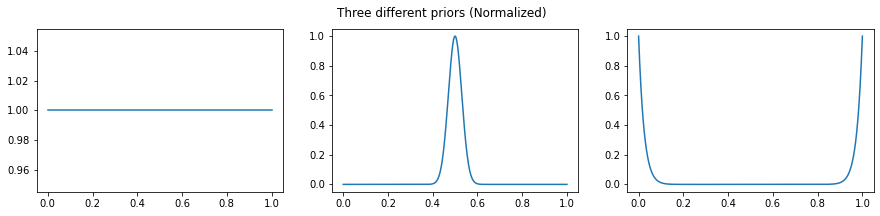

In [40]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

prio1 = first_prior(H) / np.max(first_prior(H))
plt.subplot(1, 3, 1)
plt.plot(H, prio1)

prio2 = second_prior(H) / np.max(second_prior(H))
plt.subplot(1, 3, 2)
plt.plot(H, prio2)

prio3 = third_prior(H) / np.max(third_prior(H))
plt.subplot(1, 3, 3)
plt.plot(H, prio3)

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [13]:
Data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
Data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [14]:
def posterior(H, data, prior):
    ones = np.sum(data)
    total = len(data)
    return H ** ones * (1 - H) ** (total - ones) * prior

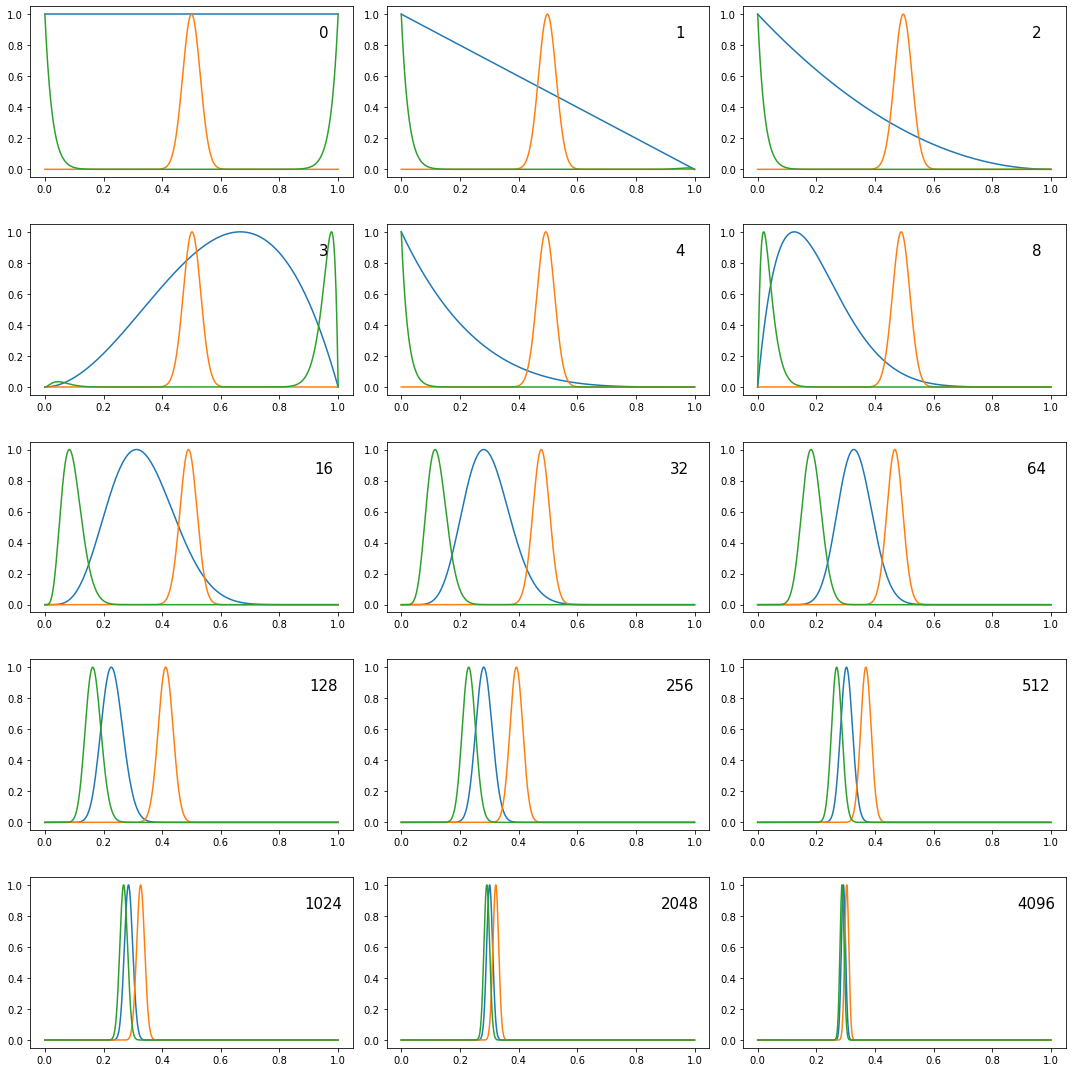

In [44]:
plt.figure(figsize=(15, 15))


for i in range(15):
    plt.subplot(5, 3, i + 1)
    post1 = posterior(H, Data[i], prio1)
    post1 = post1 / np.max(post1)
    plt.plot(H, post1)
    
    post2 = posterior(H, Data[i], prio2)
    post2 = post2 / np.max(post2)
    plt.plot(H, post2)
    
    post3 = posterior(H, Data[i], prio3)
    post3 = post3 / np.max(post3)
    plt.plot(H, post3)
    
    plt.text(0.95, 0.85, str(len(Data[i])),
             fontsize=15, ha = 'center')
    
plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [13]:
def moment(data, n):
    mu = 0
    num = 0
    for point in data:
        mu += point ** n
        num += 1
    return mu / num

## (b)

Write a function to calculate central moments of a given distribution

In [21]:
def central_moment(data, n):
    mu_1 = moment(data, 1)
    central_mu = 0
    num = 0
    for point in data:
        central_mu += (point - mu_1) ** n
        num += 1
    return central_mu / num

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [22]:
bino = np.random.binomial(p = 0.7, n = 30, size = 10 ** 6)
poiss = np.random.poisson(lam = 2.1, size = 10 ** 6)
gauss = np.random.normal(loc = 2.1,scale = 0.3, size = 10 ** 6)

In [23]:
print('binomial(raw):', '\n\t1st: ', moment(bino, 1), '\n\t2nd: ', moment(bino, 2), '\n\t3rd: ', moment(bino, 3))
print('binomial(central):', '\n\t1st: ', central_moment(bino, 1), '\n\t2nd: ', central_moment(bino, 2), '\n\t3rd: ', central_moment(bino, 3))

binomial(raw): 
	1st:  20.99967 
	2nd:  447.282972 
	3rd:  9654.66135
binomial(central): 
	1st:  -1.5796430830050668e-16 
	2nd:  6.296831891112762 
	3rd:  -2.596242136410088


In [27]:
print('poisson(raw):', '\n\t1st: ', moment(poiss, 1), '\n\t2nd: ', moment(poiss, 2), '\n\t3rd: ', moment(poiss, 3))
print('poisson(central):', '\n\t1st: ', central_moment(poiss, 1), '\n\t2nd: ', central_moment(poiss, 2), '\n\t3rd: ', central_moment(poiss, 3))

poisson(raw): 
	1st:  2.099351 
	2nd:  6.508297 
	3rd:  24.590435
poisson(central): 
	1st:  1.1871843952349081e-14 
	2nd:  2.101022378805944 
	3rd:  2.1056683208378533


In [28]:
print('gaussian(raw):', '\n\t1st: ', moment(gauss, 1), '\n\t2nd: ', moment(gauss, 2), '\n\t3rd: ', moment(gauss, 3))
print('gaussian(central):', '\n\t1st: ', central_moment(gauss, 1), '\n\t2nd: ', central_moment(gauss, 2), '\n\t3rd: ', central_moment(gauss, 3))

gaussian(raw): 
	1st:  2.0998454925069314 
	2nd:  4.49933555234551 
	3rd:  9.825841208822617
gaussian(central): 
	1st:  -4.2113761367090775e-14 
	2nd:  0.08998445994366999 
	3rd:  2.4804737767921575e-05


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [30]:
from scipy import stats

In [32]:
print('binomial(central):gauss', '\n\t1st: ', stats.moment(bino, moment = 1), '\n\t2nd: ', stats.moment(bino, moment = 2), '\n\t3rd: ', stats.moment(bino, moment = 3))
print('poisson(central):', '\n\t1st: ', stats.moment(poiss, moment = 1), '\n\t2nd: ', stats.moment(poiss, moment = 2), '\n\t3rd: ', stats.moment(poiss, moment = 3))
print('gaussian(central):', '\n\t1st: ', stats.moment(gauss, moment = 1), '\n\t2nd: ', stats.moment(gauss, moment = 2), '\n\t3rd: ', stats.moment(gauss, moment = 3))

binomial(central):gauss 
	1st:  0.0 
	2nd:  6.2968318911 
	3rd:  -2.596242136391844
poisson(central): 
	1st:  0.0 
	2nd:  2.101022378798999 
	3rd:  2.1056683208448814
gaussian(central): 
	1st:  0.0 
	2nd:  0.08998445994366988 
	3rd:  2.480473777943327e-05


# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [4]:
import pandas as pd

In [5]:
Data = pd.read_csv('data.txt', delimiter = '\t')

In [6]:
Data

,# time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


In [7]:
events = np.array(Data['number of events'])

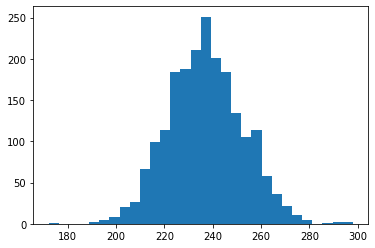

In [8]:
plt.hist(events, bins = 30)
plt.show()

## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [9]:
events = Data['number of events']

In [10]:
total_decay = events.sum()
average_decay = events.mean()

In [11]:
statistical_summaries = pd.DataFrame({'total number of decays' : [total_decay], 'average number of decays' : [average_decay]})

In [12]:
statistical_summaries

,total number of decays,average number of decays
0,485193.0,236.910645


## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

if we assume that 'the number of decays per interval' is a random variable having Poisson distribution with parameter $\lambda > 0$, we have as before:

$P(\lambda|\{data\}, I)\propto P(\{data\}|\lambda, I) \times P(\lambda|I)$

where $\lambda$ would be the 'the expected value of the number of decays' and:

$P(\{data\}|\lambda, I) \propto e^{-n\lambda} \lambda^{\sum data}$

and n is the number of data points.

the rows of the data are considered to be a random sample from a Poisson distribution, i.e. an iid sequece of random variables, therefore their joint probability distribution would be the product of that of the individuals, as mentioned above.
and the $x!$ in the denominator of Poisson pdf has been droped because it does not include any $\lambda$ dependence which we are interested in, in the first place.


In [13]:
np.exp(2)

7.38905609893065

In [44]:
from scipy.stats import poisson

In [47]:
poisson.pmf([M, 2, 3], 234)

array([0.00000000e+00, 6.49371096e-98, 5.06509455e-96])

In [38]:
def uniform_prior(l):
    if l <= 0:
        return 0
    return 1

first_prior = np.vectorize(uniform_prior)

def modified_joint_poisson(l, data):
    _data = np.array(data)
    result = 1
    for point in _data:
        result *= np.exp(- l) * l **
    return result

modified_p_data_given_parameters = np.vectorize(modified_joint_poisson, excluded = ['data'])

In [15]:
M = events.mean()
STD = events.std()

In [16]:
STD

15.363700930345448

we only search for $\lambda$ in the range $(M - 5 . STD, M + 5 . STD)$

In [36]:
L = np.linspace(M - 5 * STD, M + 5 * STD, 1000, dtype=np.float128)

In [42]:
modified_joint_poisson(M, events)

/tmp/ipykernel_19887/3646580486.py:10: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(- l) * l ** (_data.mean())


inf

In [43]:
#np.exp(-2) * 
M ** events.mean()

OverflowError: (34, 'Numerical result out of range')

In [29]:
def f(x, y):
    _y = list(y)
    return x * _y[1]

In [ ]:
[]

In [30]:
f(2, [2, 3])

6

In [31]:
F = np.vectorize(f, excluded = ['y'])

In [34]:
F(x = [1, 2, 3, 4], y = [2, 3]).mean()

7.5

In [19]:
prior = first_prior(L)
posterior = modified_p_data_given_parameters(L, data = events) * prior

ValueError: operands could not be broadcast together with shapes (1000,) (2048,) 

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.